# SVM with LDA

In [1]:
import numpy as np
import pandas as pd
features_3s = pd.read_csv("D:\My Files\Documents\College Docs\Major Project\Data/features_3_sec.csv")
features_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features_3s['label'] = labelencoder.fit_transform(features_3s['label']);

In [3]:
X = features_3s.iloc[:,2:-1].values
# X
y = features_3s.iloc[:, 59].values
# y

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
# X_train
X_test = sc.transform(X_test)
# X_test

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [7]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [8]:
y_pred = clf.predict(X_test)
y_pred

array([8, 8, 9, ..., 3, 6, 3])

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[220,   3,  10,   5,   4,  19,   8,   0,  10,   8],
       [  0, 275,   4,   0,   0,  10,   0,   0,   0,   6],
       [ 23,   3, 207,  15,   2,  13,   1,   5,   4,  40],
       [  7,   3,  11, 198,  14,   4,  12,   4,  12,  25],
       [  4,   2,   5,  23, 203,   0,  11,  15,  31,   7],
       [  5,  18,   9,   3,   1, 250,   0,   2,   3,   4],
       [ 12,   0,   2,   6,   7,   2, 262,   0,   2,  19],
       [  2,   2,  11,  18,   4,   2,   0, 225,  13,  10],
       [ 14,   1,  16,   9,  27,   5,   1,   6, 232,   7],
       [ 21,   8,  28,  38,   7,   7,  19,   6,  14, 151]], dtype=int64)

Text(159.0, 0.5, 'Truth/Actual Label')

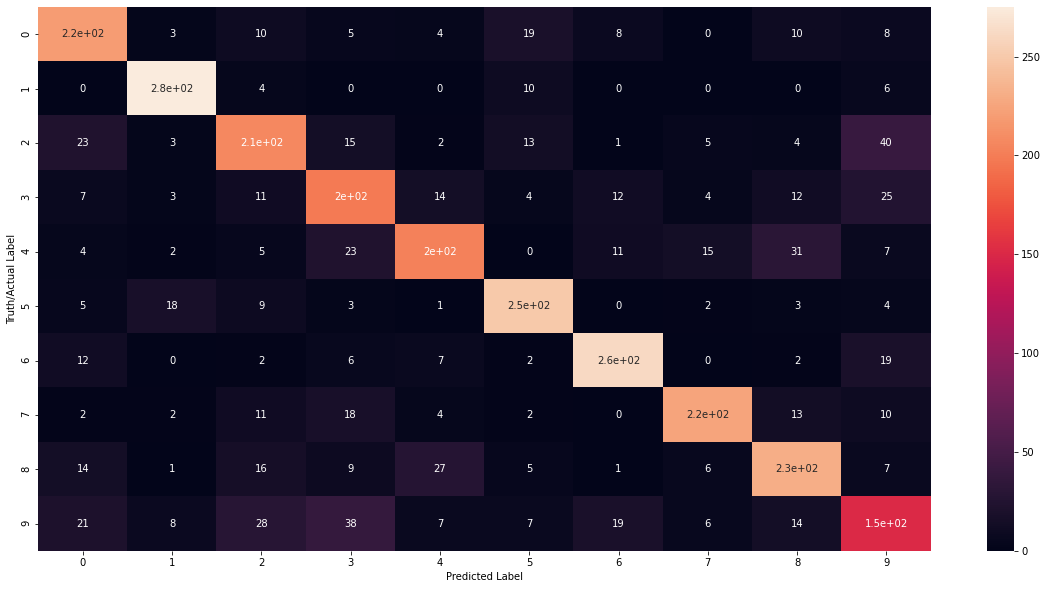

In [10]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (20,10))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Truth/Actual Label")

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       287
           1       0.87      0.93      0.90       295
           2       0.68      0.66      0.67       313
           3       0.63      0.68      0.65       290
           4       0.75      0.67      0.71       301
           5       0.80      0.85      0.82       295
           6       0.83      0.84      0.84       312
           7       0.86      0.78      0.82       287
           8       0.72      0.73      0.73       318
           9       0.55      0.51      0.52       299

    accuracy                           0.74      2997
   macro avg       0.74      0.74      0.74      2997
weighted avg       0.74      0.74      0.74      2997



In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7417417417417418

In [13]:
print ('Accuracy for SVM Classifier :', accuracy_score(y_test,  y_pred))

Accuracy for SVM Classifier : 0.7417417417417418
